In [98]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

win/loss function - based on two arbitrary "skill" values for each player (simplified compared to real world, 
but alright as an approximation)
I'm going to run though a few different example functions and see which ones work best, looking for these things:
- A somewhat random result between two players of low skill
- An improvement in win rates as your skill raises but the skill differential remains the same
(e.g. 0.1 vs. 0 and 1 vs. 0.9)
- An improvement in win rates as the skill differential raises but your skill remains the same (e.g. 0.99 vs. 0.98 and 0.99 vs. 0.90)
- A very high, but not unbeatable chance of the better player winning near 100% skill

A normal distribution seems like a good way to go about this, as it provides chances of anyone beating anyone, but just makes it exponentially rarer as the skill differential gets higher. Something to note is that we have to be very careful while picking the mean for the normal distribution, as we need it to always be 0.0 for games between two players of the same skill

In [99]:
#let's start with a very naive method - the same distribution for every game at all skill levels

def game(skill1, skill2):
    return skill1 - skill2 + np.random.normal(0.0, 1)

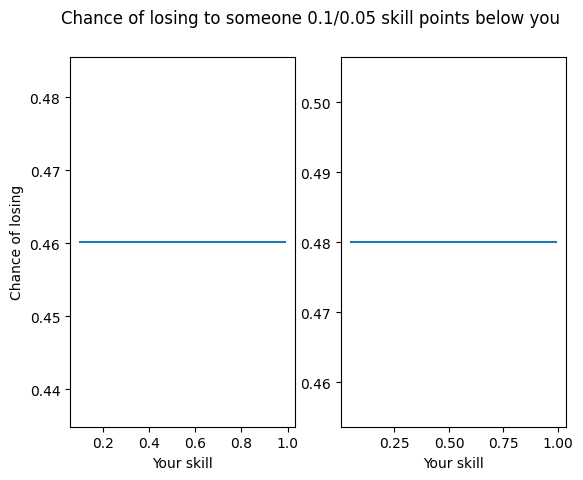

In [100]:
loss_probabilities = []
for skill in np.arange(0.1, 1, 0.01):
    loss_probabilities.append(scipy.stats.norm(0.0, 1).cdf(-0.1))
plt.suptitle("Chance of losing to someone 0.1/0.05 skill points below you")
plt.subplot(1, 2, 1)
plt.xlabel("Your skill")
plt.ylabel("Chance of losing")
plt.plot(np.arange(0.1, 1, 0.01), loss_probabilities)
loss_probabilities = []
for skill in np.arange(0.05, 1, 0.01):
    loss_probabilities.append(scipy.stats.norm(0.0, 1).cdf(-0.05))
plt.subplot(1, 2, 2)
plt.xlabel("Your skill")
plt.plot(np.arange(0.05, 1, 0.01), loss_probabilities)

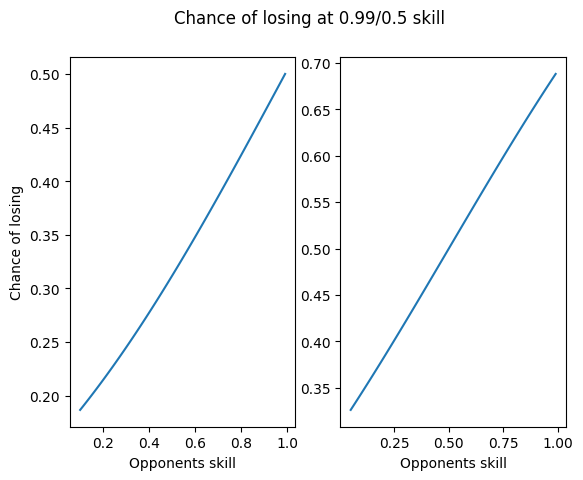

In [101]:
loss_probabilities = []
for skill in np.arange(0.1, 1, 0.01):
    loss_probabilities.append(scipy.stats.norm(0.0, 1).cdf(-(0.99 - skill)))
plt.suptitle("Chance of losing at 0.99/0.5 skill")
plt.subplot(1, 2, 1)
plt.xlabel("Opponents skill")
plt.ylabel("Chance of losing")
plt.plot(np.arange(0.1, 1, 0.01), loss_probabilities)
loss_probabilities = []
for skill in np.arange(0.05, 1, 0.01):
    loss_probabilities.append(scipy.stats.norm(0.0, 1).cdf(-(0.5 - skill)))
plt.subplot(1, 2, 2)
plt.xlabel("Opponents skill")
plt.plot(np.arange(0.05, 1, 0.01), loss_probabilities)

This uniform probability is nice for the skill differential side of things, but it doesn't really fit what we want for the actual win rates vs. players of lower skill, and doesn't have enough drop off (0.46 loss rate at 0.1 below vs. 0.48 loss rate at 0.05 below)

In [102]:
#let's try to implement the skill level a little more by removing some variance when max skill of the two players
#gets higher
def game(skill1, skill2):
    return skill1 - skill2 + np.random.normal(0.0, 1 - max(skill1, skill2))

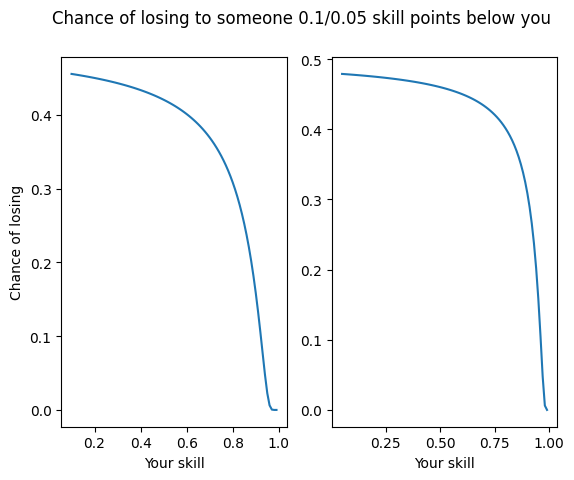

In [103]:
loss_probabilities = []
for skill in np.arange(0.1, 1, 0.01):
    loss_probabilities.append(scipy.stats.norm(0.0, 1 - skill).cdf(-0.1))
plt.suptitle("Chance of losing to someone 0.1/0.05 skill points below you")
plt.subplot(1, 2, 1)
plt.xlabel("Your skill")
plt.ylabel("Chance of losing")
plt.plot(np.arange(0.1, 1, 0.01), loss_probabilities)
loss_probabilities = []
for skill in np.arange(0.05, 1, 0.01):
    loss_probabilities.append(scipy.stats.norm(0.0, 1 - skill).cdf(-0.05))
plt.subplot(1, 2, 2)
plt.xlabel("Your skill")
plt.plot(np.arange(0.05, 1, 0.01), loss_probabilities)

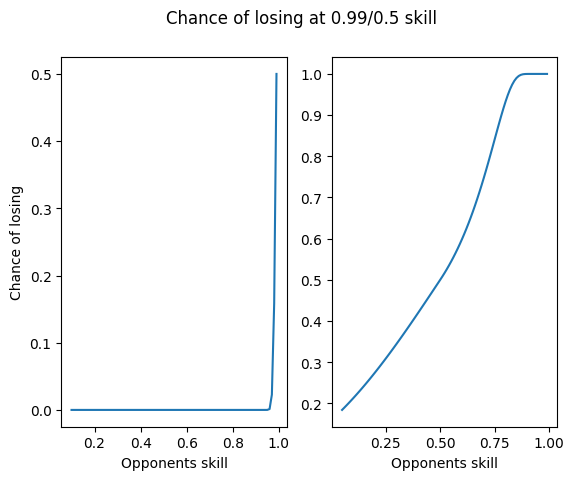

In [104]:
loss_probabilities = []
for skill in np.arange(0.1, 1, 0.01):
    loss_probabilities.append(scipy.stats.norm(0.0, 1 - max(0.99, skill)).cdf(-(0.99 - skill)))
plt.suptitle("Chance of losing at 0.99/0.5 skill")
plt.subplot(1, 2, 1)
plt.xlabel("Opponents skill")
plt.ylabel("Chance of losing")
plt.plot(np.arange(0.1, 1, 0.01), loss_probabilities)
loss_probabilities = []
for skill in np.arange(0.05, 1, 0.01):
    loss_probabilities.append(scipy.stats.norm(0.0, 1 - max(0.5, skill)).cdf(-(0.5 - skill)))
plt.subplot(1, 2, 2)
plt.xlabel("Opponents skill")
plt.plot(np.arange(0.05, 1, 0.01), loss_probabilities)

This method defenitely has some issues:
- It doesn't see much improvement in win rates until you get a very high skill level (0.7 skill shouldn't be losing to 0.6 skill almost 40% of the time), and when it does have improvements, it's far too rarpid
- It's incredibly rare to beat someone at a higher skill level once you get close to 1

In [105]:
#let's try to incorporate the skill diffential a little in the norm

def game(skill1, skill2):
    return skill1 - skill2 + np.random.normal(skill1 - skill2, 1 - max(skill1, skill2))

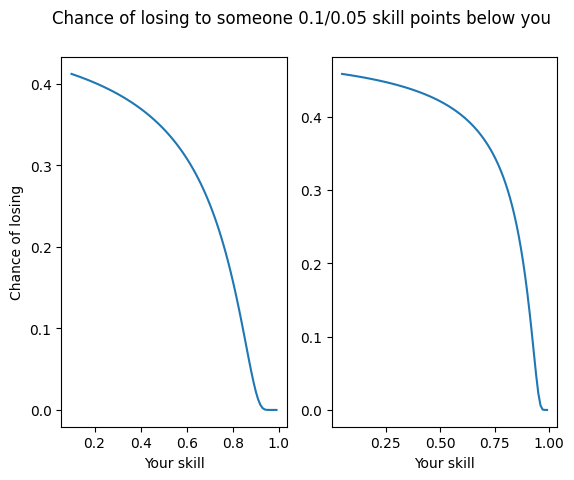

In [106]:
loss_probabilities = []
for skill in np.arange(0.1, 1, 0.01):
    loss_probabilities.append(scipy.stats.norm(0.1, 1 - skill).cdf(-0.1))
plt.suptitle("Chance of losing to someone 0.1/0.05 skill points below you")
plt.subplot(1, 2, 1)
plt.xlabel("Your skill")
plt.ylabel("Chance of losing")
plt.plot(np.arange(0.1, 1, 0.01), loss_probabilities)
loss_probabilities = []
for skill in np.arange(0.05, 1, 0.01):
    loss_probabilities.append(scipy.stats.norm(0.05, 1 - skill).cdf(-0.05))
plt.subplot(1, 2, 2)
plt.xlabel("Your skill")
plt.plot(np.arange(0.05, 1, 0.01), loss_probabilities)

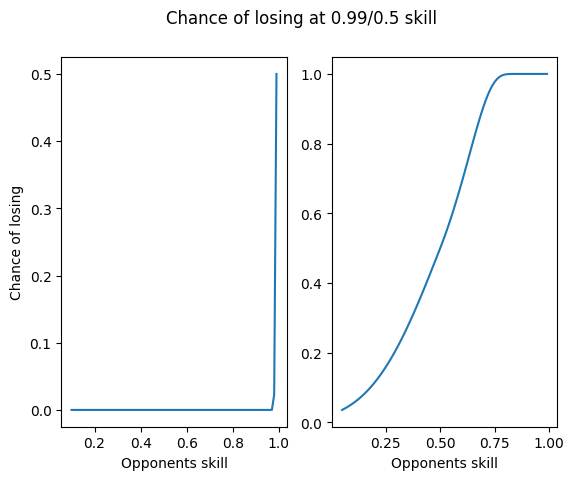

In [107]:
loss_probabilities = []
for skill in np.arange(0.1, 1, 0.01):
    loss_probabilities.append(scipy.stats.norm(0.99 - skill, 1 - max(0.99, skill)).cdf(-(0.99 - skill)))
plt.suptitle("Chance of losing at 0.99/0.5 skill")
plt.subplot(1, 2, 1)
plt.xlabel("Opponents skill")
plt.ylabel("Chance of losing")
plt.plot(np.arange(0.1, 1, 0.01), loss_probabilities)
loss_probabilities = []
for skill in np.arange(0.05, 1, 0.01):
    loss_probabilities.append(scipy.stats.norm(0.5 - skill, 1 - max(0.5, skill)).cdf(-(0.5 - skill)))
plt.subplot(1, 2, 2)
plt.xlabel("Opponents skill")
plt.plot(np.arange(0.05, 1, 0.01), loss_probabilities)

This method seems better in the general trends, improving in terms of the progression of win rate beating someone 0.1 skill below you, but it still has a lot of those exponential issues